# Titanic: Machine Learning from Disaster
https://www.kaggle.com/c/titanic/data

* Passengerid: ID
* survived: 생존여부 (0=사망, 1=생존)
* pclass: 선실등급
* sex, name, Age
* sibsp: 동승 가족 수(형제자매, 배우자)
* parch: 동승 가족 수(부모님, 어린이)
* ticket: 티켓 ID
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구(C=Cherbourg, Q=Queenstown, S=Southampton)

## Import library

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# => notebook의 브라우저에서 바로 Grapic을 볼 수 있게해줌

import warnings
warnings.filterwarnings('ignore')  # ignore warnings

## Read the data

In [51]:
train = pd.read_csv("./train.csv")

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [52]:
# train.describe(include="all")  # include="all" : include the object data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
train.info()

# Null-value : Age, Cabin, Embarked
# object dtype : Name, Sex, Ticket, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Basic Analysis

In [54]:
print(train.columns)  # columns list

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [55]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* PassengerId : ID values
* Survived : Categorical Feature - 0 or 1
* Pclass : Categorical Feature - 1,2,3
* Name = Passenger ID ==> removable
* Sex : need Embeding
* Ticket : How to Cleaning?
* Cabin : How to Cleaning?
* Embarked : need Embeding

In [56]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Age : Survived 예측할 때 필요할 것으로 보임 ==> fill the Nulls

In [57]:
print(pd.isnull(train).sum())  # null value 갯수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


* Cabin : 선실 등급은 Pclass에 있으므로 크게 의미있는 값인지 모르겠음  
    ==> 891개 중에 687개의 Null값(77.1%) 처리 어려움
* Embarked : 2개의 Null값 비교적 처리 쉬움

## Visualization

### Pclass

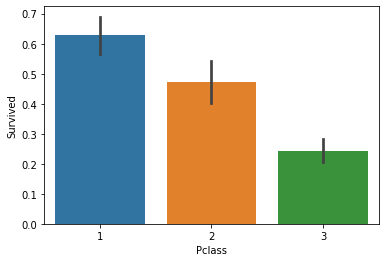

In [58]:
sns.barplot(x="Pclass", y="Survived", data=train)

* Pclass가 높을수록(숫자가 작을수록 높음) Survive 확률 높음

### Sex

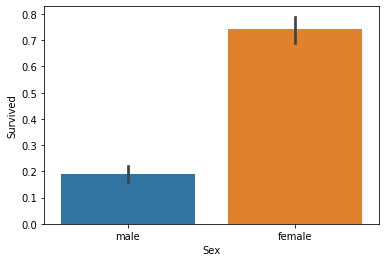

In [59]:
sns.barplot(x="Sex", y="Survived", data=train)

In [60]:
print("Females who survived:", train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1] * 100)
print("Males who survived:", train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1] * 100)

Females who survived: 74.20382165605095
Males who survived: 18.890814558058924


* Female의 Survive 확률 높음

### SibSp

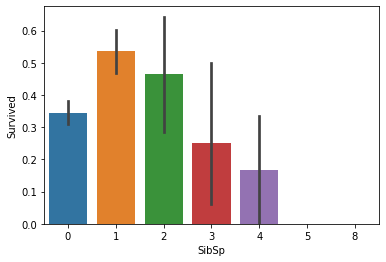

In [61]:
sns.barplot(x="SibSp", y="Survived", data=train)

* SibSp(동승자 수 - 형제, 배우자) = 1, 2의 생존율 높음

### Parch

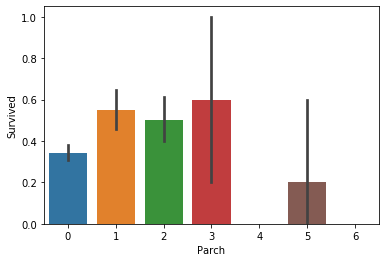

In [62]:
sns.barplot(x="Parch", y="Survived", data=train)

* Parch(동승자 - 부모, 자식)가 1~3인 경우보다 동승자가 없는 경우의 생존율이 낮음

### Age

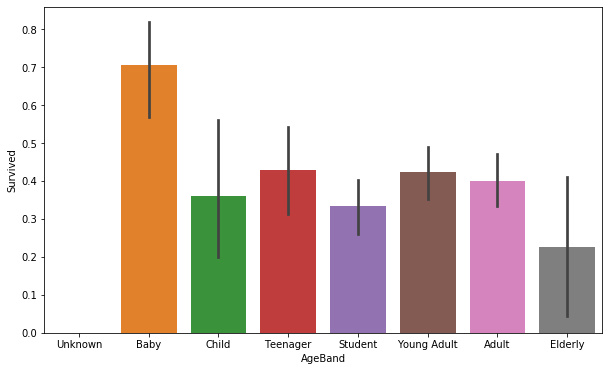

In [63]:
# Age ==> Categorical Feature

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    elif age <= np.inf: cat = 'Elderly'
#    else: cat = 'Elderly'
    return cat

plt.figure(figsize=(10, 6))  # 막대그래프의 크기 figure 설정

labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
train['AgeBand'] = train['Age'].apply(lambda x : get_category(x))

sns.barplot(x="AgeBand", y="Survived", data=train, order=labels)  # lables로 x축 label 순서 지정

* Baby(0~5세)가 압도적으로 생존율이 높음

### Sex & AgeBand

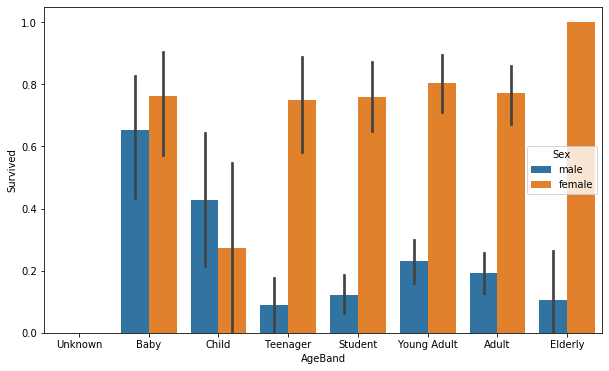

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeBand', y='Survived', hue='Sex', data=train, order=labels)
# hue

## Data Preprocessing

In [65]:
test = pd.read_csv("./test.csv")

test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Null-value : Age, Fare, Cabin

In [67]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult


In [68]:
# Embarked Null-value fill
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Age Feature

In [69]:
combine = [train, test]

for data in combine:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [70]:
for data in combine:
    data['Title'] = data['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'], 'Rare')
    data['Title'] = data['Title'].replace(['Countess','Lady','Sir'], 'Royal')
    data['Title'] = data['Title'].replace('Mlle','Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [71]:
agebands = train['AgeBand'].unique()
agebands = np.delete(agebands,3)
bands = {}

for ageband in agebands:
    bands.update({ageband:round(train[train['AgeBand'] == ageband]['Age'].mean())})

bands

{'Student': 22.0,
 'Adult': 45.0,
 'Young Adult': 30.0,
 'Baby': 3.0,
 'Teenager': 17.0,
 'Child': 9.0,
 'Elderly': 66.0}

In [72]:
ages = {}
titles = train['Title'].unique()

for title in titles:
    ages.update({title:bands[train[train['Title'] == title]['AgeBand'].mode()[0]]})
    
ages

{'Mr': 30.0,
 'Mrs': 45.0,
 'Miss': 22.0,
 'Master': 3.0,
 'Rare': 45.0,
 'Royal': 45.0}

In [80]:
for i in range(len(train['AgeBand'])):
    if np.isnan(train['Age'][i]):
        train['Age'][i] = ages[train['Title'][i]]
        
test['AgeBand'] = test['Age'].apply(lambda x : get_category(x))
for i in range(len(test['AgeBand'])):
    if np.isnan(test['Age'][i]):
        test['Age'][i] = ages[test['Title'][i]]

In [105]:
from sklearn import preprocessing

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','AgeBand','Title'], axis=1, inplace=True)
    return df

def fillna(df):
    df['Embarked'].fillna('S', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def format_features(df):
    features = ['Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [106]:
# preprocessing
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [107]:
from sklearn.model_selection import train_test_split

y_df = train['Survived']
X_df = train.drop('Survived', axis=1)

X_df = transform_features(X_df)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state = 122)

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=122)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier accuracy: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=122)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier accuracy: {0: .4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression
lr_clf = LogisticRegression(random_state=122)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression accuracy: {0: .4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier accuracy:  0.7207
RandomForestClassifier accuracy:  0.7654
LogisticRegression accuracy:  0.7654
